# PRCP-1007-Liver Patient Prediction

# PROJECT TEAM ID : PTID-CDS-FEB-23-1459

## Problem Statement

#### Task 1: Prepare a complete data analysis report on the given data.

#### Task 2: Create a predictive model with implementation of  different classifiers on liver patient diseases dataset to predict liver diseases.

#### Task3: Create an analysis to show on what basis you have designed your model.  

In [1]:
#Let's start with importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 

In [2]:
# loading the dataset
data=pd.read_csv('Indian Liver Patient Dataset (ILPD).csv')
data

,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.9,1
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
...,...,...,...,...,...,...,...,...,...,...,...
577,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
578,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
579,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
580,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [3]:
# here we are adding the columns names to the data set
columns = ['Age_of_the_patient', 'Gender_of_the_patient','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio','Liver_disease']
data = pd.read_csv('Indian Liver Patient Dataset (ILPD).csv',header=None,names = columns)
data

,Age_of_the_patient,Gender_of_the_patient,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_disease
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


# Some basic checkings

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age_of_the_patient          583 non-null    int64  
 1   Gender_of_the_patient       583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Liver_disease               583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [5]:
data.isnull().sum()

Age_of_the_patient            0
Gender_of_the_patient         0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Liver_disease                 0
dtype: int64

In [6]:
data.describe()

,Age_of_the_patient,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_disease
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [7]:
data.Liver_disease.value_counts()

1    416
2    167
Name: Liver_disease, dtype: int64

# Domine Analysis 

# What is liver disease?

Your liver is your body’s second-largest organ (after the skin). It sits just under your ribcage on the right side and is about the size of a football. The liver separates nutrients and waste as they move through your digestive system. It also produces bile, a substance that carries toxins out of your body and aids in digestion.

The term “liver disease” refers to any of several conditions that can affect and damage your liver. Over time, liver disease can cause cirrhosis (scarring). As more scar tissue replaces healthy liver tissue, the liver can no longer function properly. Left untreated, liver disease can lead to liver failure and liver cancer.

# How common is liver disease?

Overall, about 1 in 10 Americans (30 million in total) have some type of liver disease. About 5.5 million people in the U.S. have chronic liver disease or cirrhosis.

Some types of liver disease are becoming more common in the U.S. because they are related to rising rates of obesity. An estimated 20% to 30% of adults have excess fat in their liver, a condition called non-alcohol rekated fatty liver disease (NAFD). This may be renamed metabolic-associated fatty liver disease (MAFLD) to reflect its relationship to metabolic syndrome and conditions like diabetes, high blood pressure, high cholesterol and obesity.

# What causes different types of liver disease?

Different types of liver disease result from different causes. Liver disease may result from:

Viral infections: Hepatitis A, hepatitis B and hepatitis C are diseases caused by a viral infection. Problems with your immune system: When your immune system mistakenly attacks your liver, it can cause autoimmune liver diseases. These include primary biliary cholangitis and autoimmune hepatitis. Inherited diseases: Some liver problems develop because of a genetic condition (one you inherit from your parents). Inherited liver diseases include Wilson disease and hemochromatosis. Cancer: When abnormal cells multiply in your liver, you may develop tumors. These tumors may be benign (noncancerous) or malignant (liver cancer). Consuming too many toxins: Alcohol-related fatty liver disease is the result of alcohol use. Non-alcohol related fatty liver disease (NAFLD) results from consuming too much fat. NAFLD is becoming more common as rates of obesity and diabetes rise.

# What are the symptoms of liver disease?

Some types of liver disease (including non-alcohol fatty liver disease) rarely cause symptoms. For other conditions, the most common symptom is jaundice — a yellowing of your skin and the whites of your eyes. Jaundice develops when your liver can’t clear a substance called bilirubin.

Other signs of liver disease may include:

Abdominal (belly) pain (especially on the right side). Bruising easily. Changes in the color of your urine or stool. Fatigue. Nausea or vomiting. Swelling in your arms or legs (edema).

# Columns Name:
##### 1.Age -:
Tells the person's age.

##### 2.Gender - :
(Male or Female) Tells the person's gender. This is a very controversial column as we now know that there can be a spectrum of genders. But here we will only consider two genders.

##### 3.Total_Bilirubin -
A bilirubin test measures the amount of bilirubin in your blood. It’s used to help find the cause of health conditions like jaundice, anemia, and liver disease. Bilirubin is an orange-yellow pigment that occurs normally when part of your red blood cells break down. Your liver takes the bilirubin from your blood and changes its chemical make-up so that most of it is passed through your poop as bile. If your bilirubin levels are higher than normal, it’s a sign that either your red blood cells are breaking down at an unusual rate or that your liver isn’t breaking down waste properly and clearing the bilirubin from your blood.Another option is that there’s a problem somewhere along the pathway that gets the bilirubin out of your liver and into your stool.

##### 4.Direct_Bilirubin -
It's technically the same as "Total_Bilirubin". Bilirubin attached by the liver to glucuronic acid, a glucose-derived acid, is called direct, or conjugated, bilirubin. Bilirubin not attached to glucuronic acid is called indirect, or unconjugated, bilirubin. All the bilirubin in your blood together is called total bilirubin.

##### 5.Alkaline_Phosphotase - .......
Alkaline phosphatase (ALP) is an enzyme in a person's blood that helps break down proteins. The body uses ALP for a wide range of processes, and it plays a particularly important role in liver function and bone development.Using an ALP test, it is possible to measure how much of this enzyme is circulating in a person’s blood.

##### 6.Alamine_Aminotransferase - First of all it is "Alanine" and not "Alamine" .
Alanine aminotransferase (ALT) is an enzyme found primarily in the liver and kidney. It was originally referred to as serum glutamic pyruvic transaminase (SGPT). Normally, a low level of ALT exists in the serum. ALT is increased with liver damage and is used to screen for and/or monitor liver disease. Alanine aminotransferase (ALT) is usually measured concurrently with AST as part of a liver function panel to determine the source of organ damage.

##### 7.Aspartate_Aminotransferase -
AST (aspartate aminotransferase) is an enzyme that is found mostly in the liver, but also in muscles. When your liver is damaged, it releases AST into your bloodstream. An AST blood test measures the amount of AST in your blood. The test can help your health care provider diagnose liver damage or disease.

##### 8.Total_protein -
Albumin and globulin are two types of protein in your body. The total protein test measures the total amount albumin and globulin in your body. It's used as part of your routine health checkup. It may also be used if you have unexpected weight loss, fatigue, or the symptoms of a kidney or liver disease.

##### 9.Albumin -
I think it's related to the protein in our bodies....

##### 10.Albumin_and_Globulin_Ratio -
The Albumin to Globulin ratio (A:G) is the ratio of albumin present in serum in relation to the amount of globulin. The ratio can be interpreted only in light of the total protein concentration. Very generally speaking, the normal ratio in most species approximates 1:1.

##### 11.Liver_disease-
This is labelled incorrectly. From my perspective it should be "Liver_Disease" indicating that the patient has liver disease or not

So, now we have a better understanding of the dataset let's first make the changes that are required to be made

# EDA (Exploratory Data Analysis)

In [8]:
data.describe()

,Age_of_the_patient,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_disease
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [129]:
import sweetviz as sv
graphs=sv.analyze(data)
graphs.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Here the sweet viz grapical shows quick overview of the dataset, including the distribution of values, missing values, and correlations between variables.
### Compare the distributions of variables between patients with liver disease and those without liver disease.¶

# Univariate Analysis

In [10]:
data.Liver_disease.value_counts()

1    416
2    167
Name: Liver_disease, dtype: int64

<AxesSubplot:xlabel='Liver_disease', ylabel='count'>

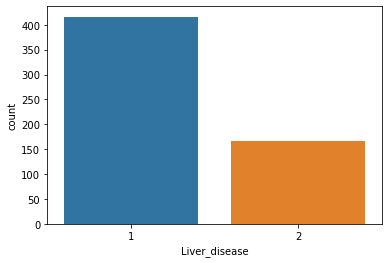

In [11]:
sns.countplot(x='Liver_disease',Label='count',data=data)

In [12]:
data.Gender_of_the_patient.value_counts()

Male      441
Female    142
Name: Gender_of_the_patient, dtype: int64

<AxesSubplot:xlabel='Gender_of_the_patient', ylabel='count'>

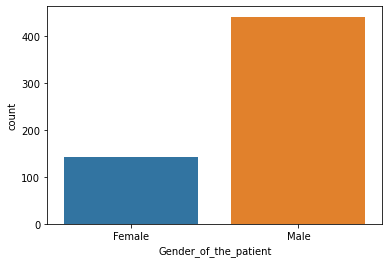

In [13]:
sns.countplot(x='Gender_of_the_patient',label='count',data=data)

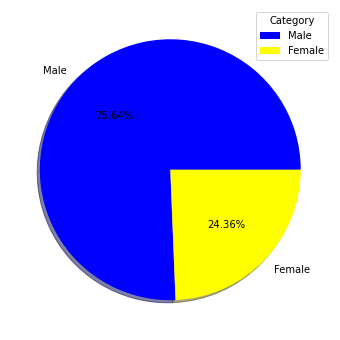

In [14]:
# drawing a pie chart
plt.figure(figsize=(6,6))
labels=['Male','Female']
size=data['Gender_of_the_patient'].value_counts()
colors=['blue','yellow']
explode=[0,0]
plt.pie(size,labels=labels,colors=colors,explode=explode,autopct='%.2f%%',shadow=True)
plt.legend(labels,loc=0,title='Category')
plt.show()

## 75.64% are male and 24.36% are female

# Bivaraite Analysis

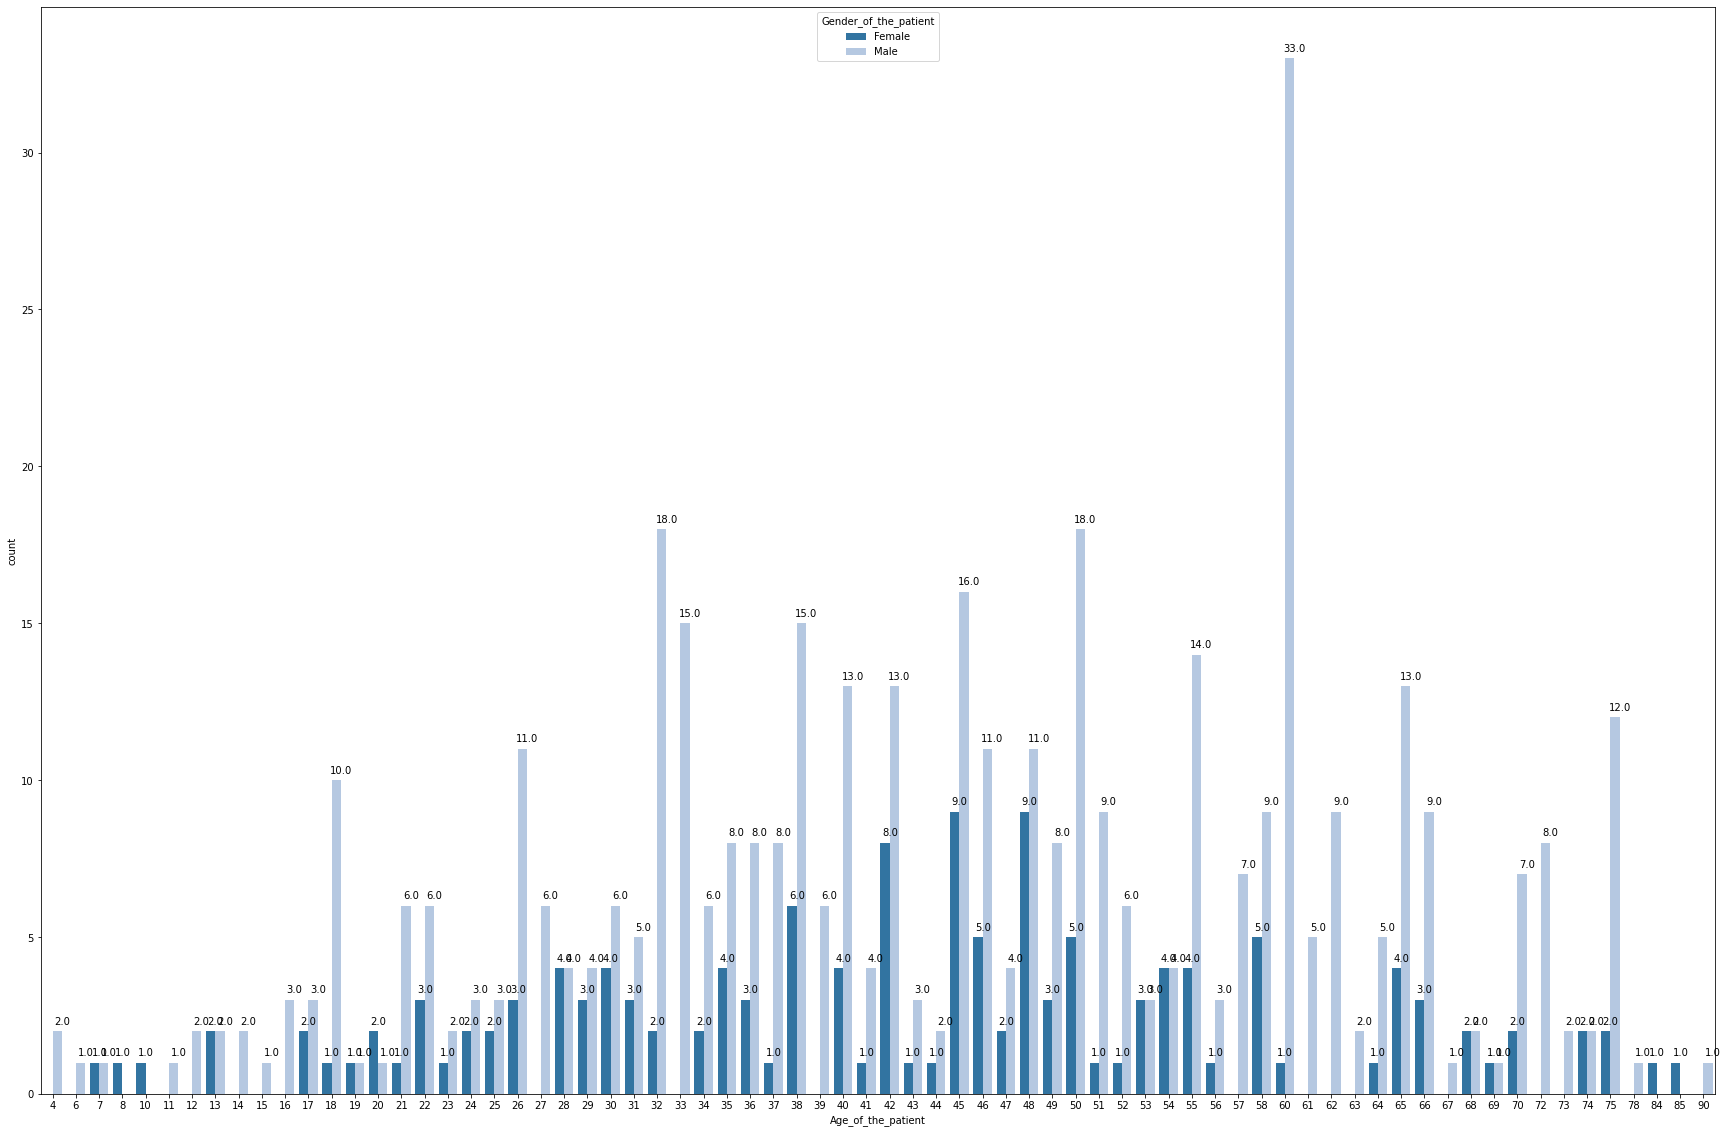

In [15]:
## Analysing Age and Gender
plt.figure(figsize=(30,20))
b=sns.countplot(x=data['Age_of_the_patient'],hue=data['Gender_of_the_patient'],palette='tab20')
for bar in b.patches:
        b.annotate(format(bar.get_height()),
            (bar.get_x() + bar.get_width() / 2,
            bar.get_height()), ha='center', va='center',
            size=10, xytext=(5, 10),textcoords='offset points')
plt.show()

# There are 33 male in the age 60 and 9 female 45 and 49

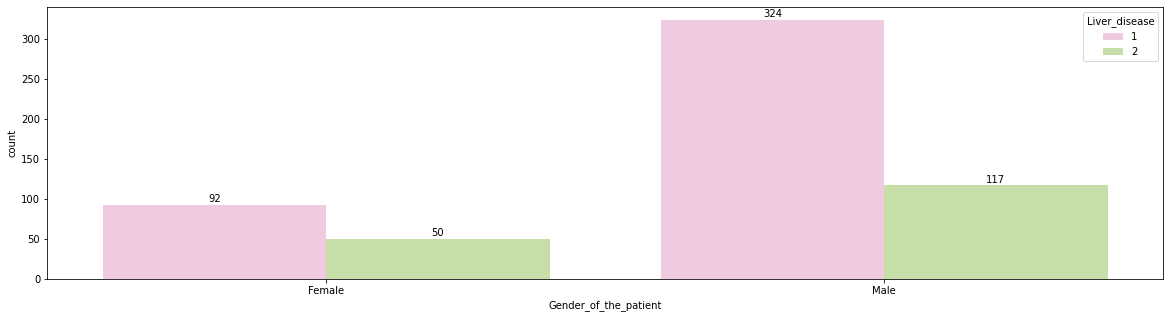

In [16]:
## Analysing Gender and  Target variable

plt.figure(figsize=(20,5))
b=sns.countplot(x=data['Gender_of_the_patient'],hue=data['Liver_disease'],palette='PiYG')
for bar in b.patches:
        b.annotate(format(bar.get_height()),
            (bar.get_x() + bar.get_width() / 2,
            bar.get_height()), ha='center', va='center',
            size=10, xytext=(0, 6),textcoords='offset points')
plt.show()

## In the above plot we can see 324 Males and 92 Females have liver disease.

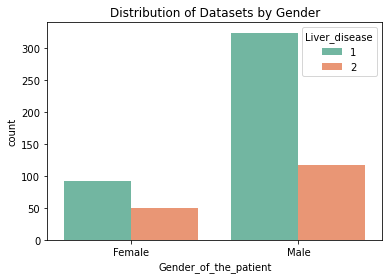

In [17]:
# Gender Distribution of 2 Dataset
sns.countplot(x='Gender_of_the_patient',data=data,hue='Liver_disease',palette="Set2")
plt.title('Distribution of Datasets by Gender')
plt.show()

# Multivariate Analysis

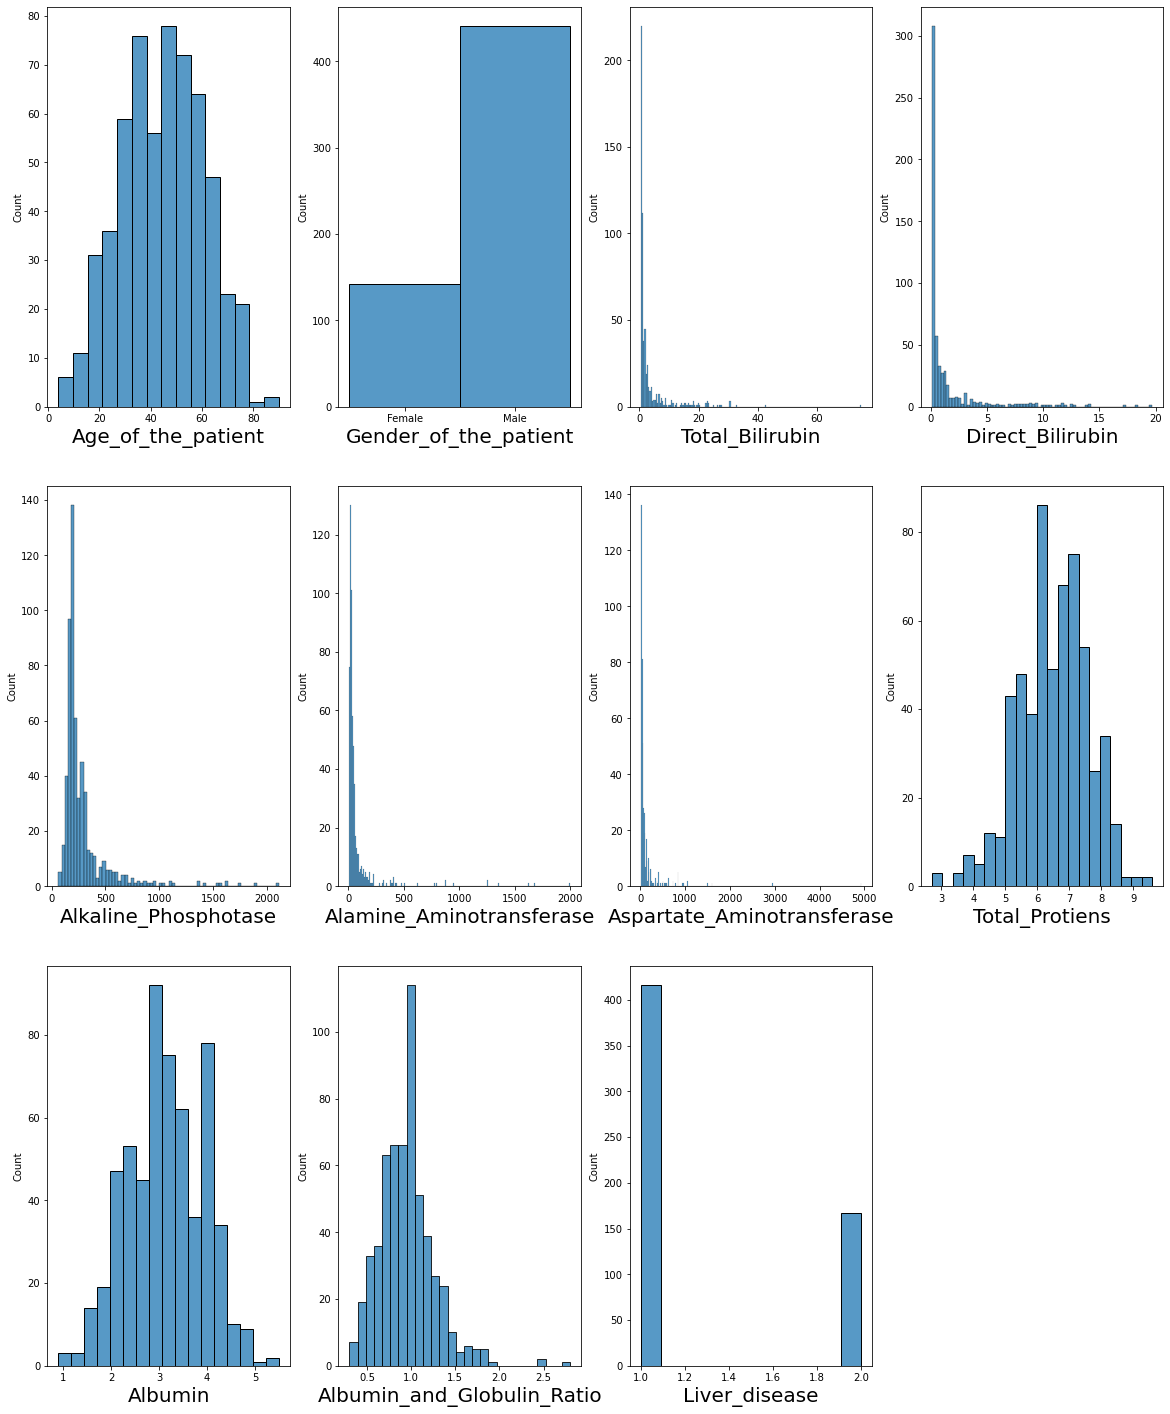

In [18]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=11 :
        ax = plt.subplot(3,4,plotnumber)
        sns.histplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

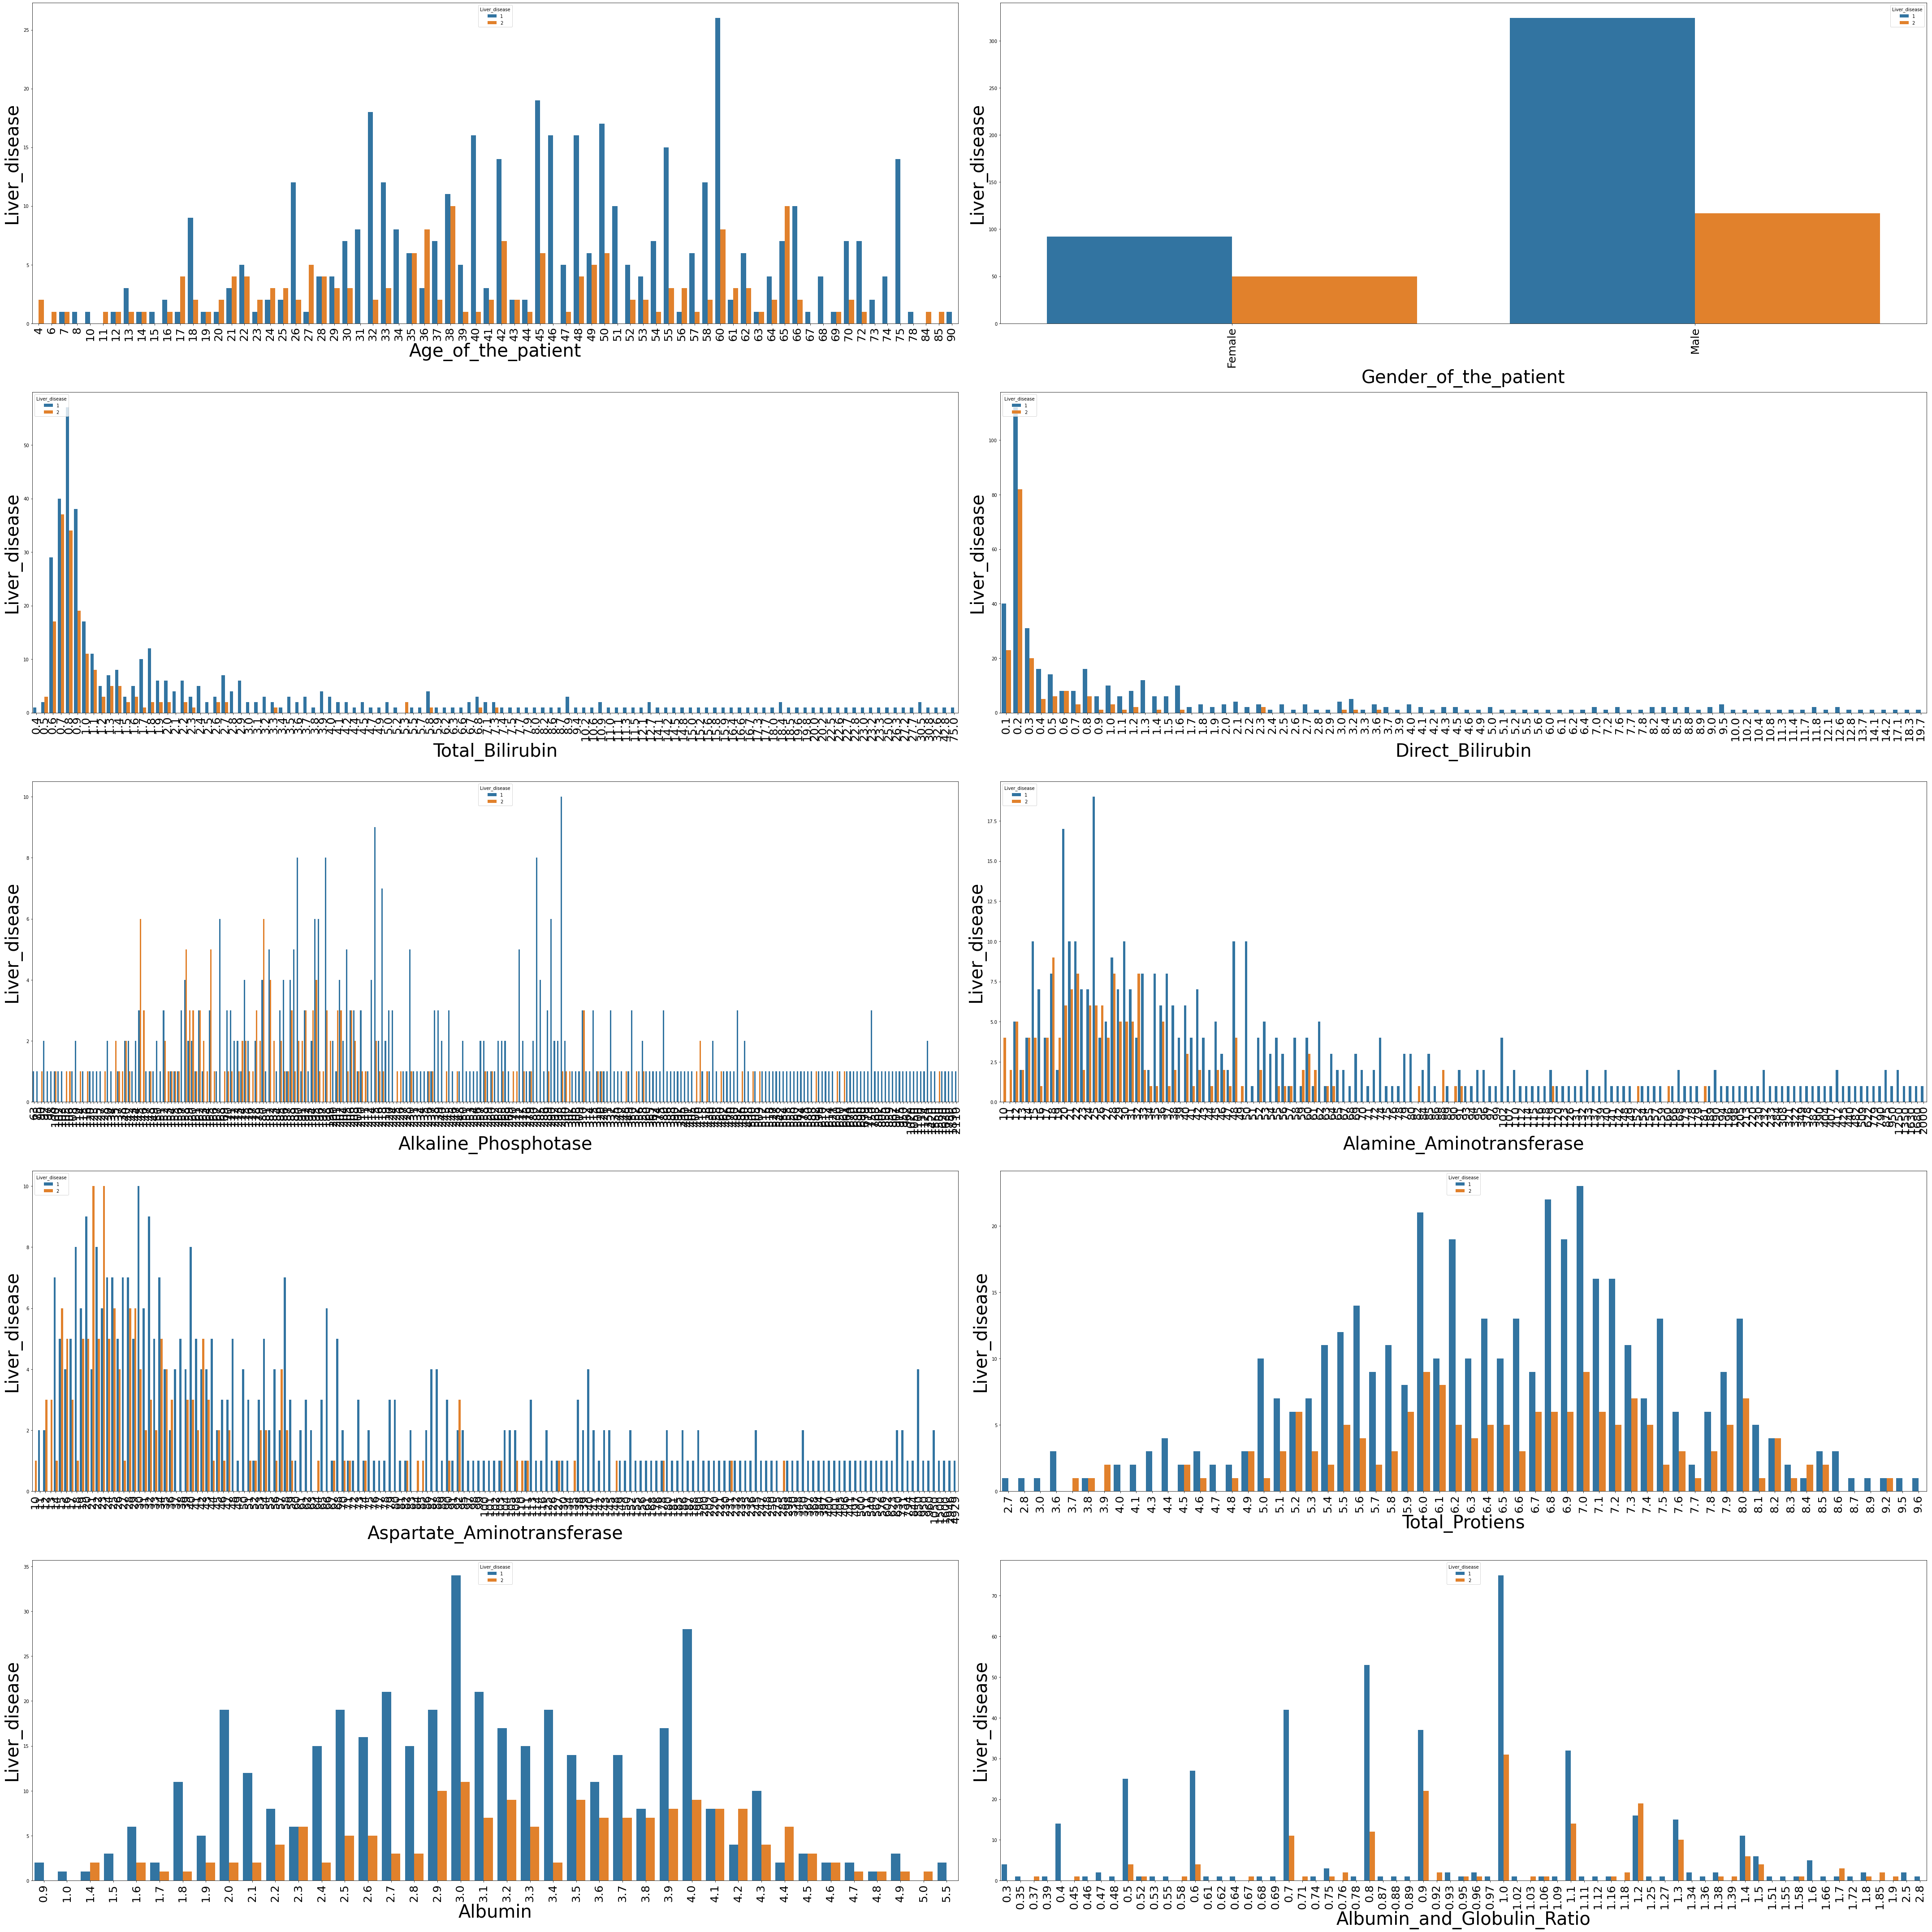

In [19]:
plt.figure(figsize=(60,60), facecolor='white') ##canvas size
plotnumber = 1  ##count variable

for column in data:  ## for loop to acess columns form data1
    if plotnumber<= 10:  ##checking whether count variable is less than 16 or not
        ax = plt.subplot(5,2,plotnumber) ##plotting 8 graphs in canvas(4 rows and 4 columns)
        sns.countplot(x=data[column].dropna(axis=0),hue=data.Liver_disease)  ##plotting count plot 
        plt.xlabel(column,fontsize=40)   ##assigning name to x-axis and increasing it's font 
        plt.ylabel('Liver_disease',fontsize=40) ##assigning name to y-axis and increasing it's font 
        plt.xticks(fontsize=25, rotation=90)
    plotnumber+=1 ##increasing counter
plt.tight_layout()

# Inferences from Data Visualization:

### We can clearly see in the output as well as in the graph that, it is an imbalanced dataset, any patients diagnosed with liver disease are higher compared to the ones who are not diagnosed.

###  We can clearly see in the output as well as in the graph that, number of patient suffering from liver disease are higher in males than in females.

### Here is another interactive plot() that shows, males are at higher risk of chronic liver diseases as compare to females.

### Before, we have seen some of the visualization based on gender (separately), here in this FacetGrid plot we can track cases according to both Gender and Age.

### Here in this plot(), we have plotted Total_bilirubin vs Direct_Bilrubin and got the insight that both of the features have a direct relationship with each other.

### In this FacetGrid plot we are plotting two significant features(Alamine and Aspartate -Aminotransferase) along with Gender as a form of hue and it clearly shows that males are highly effective concerning these two features the most.

### In this plot, we can see that Alkaline _Phosphotase and Alamine_Aminotransferase do have a direct regressive relationship but we can also note that there are a bit “outliers” too from the side of Alamine_Aminotransferase.

### Now with the help of the above plot we can find out that, Total_protiens and Albumin features are in positive regressive nature, with some outliers.

### After plotting Albumin and Albumin_and_Globulin_Ratio we conclude that they both share normal distribution and have a direct relationship like some other features in the dataset.

### Here in this plot, we are trying to show that though Albumin and Globulin Ratio has regressive datapoints yet the most crowded (hotspot) being the male region i.e. they are at high risk in these features too.

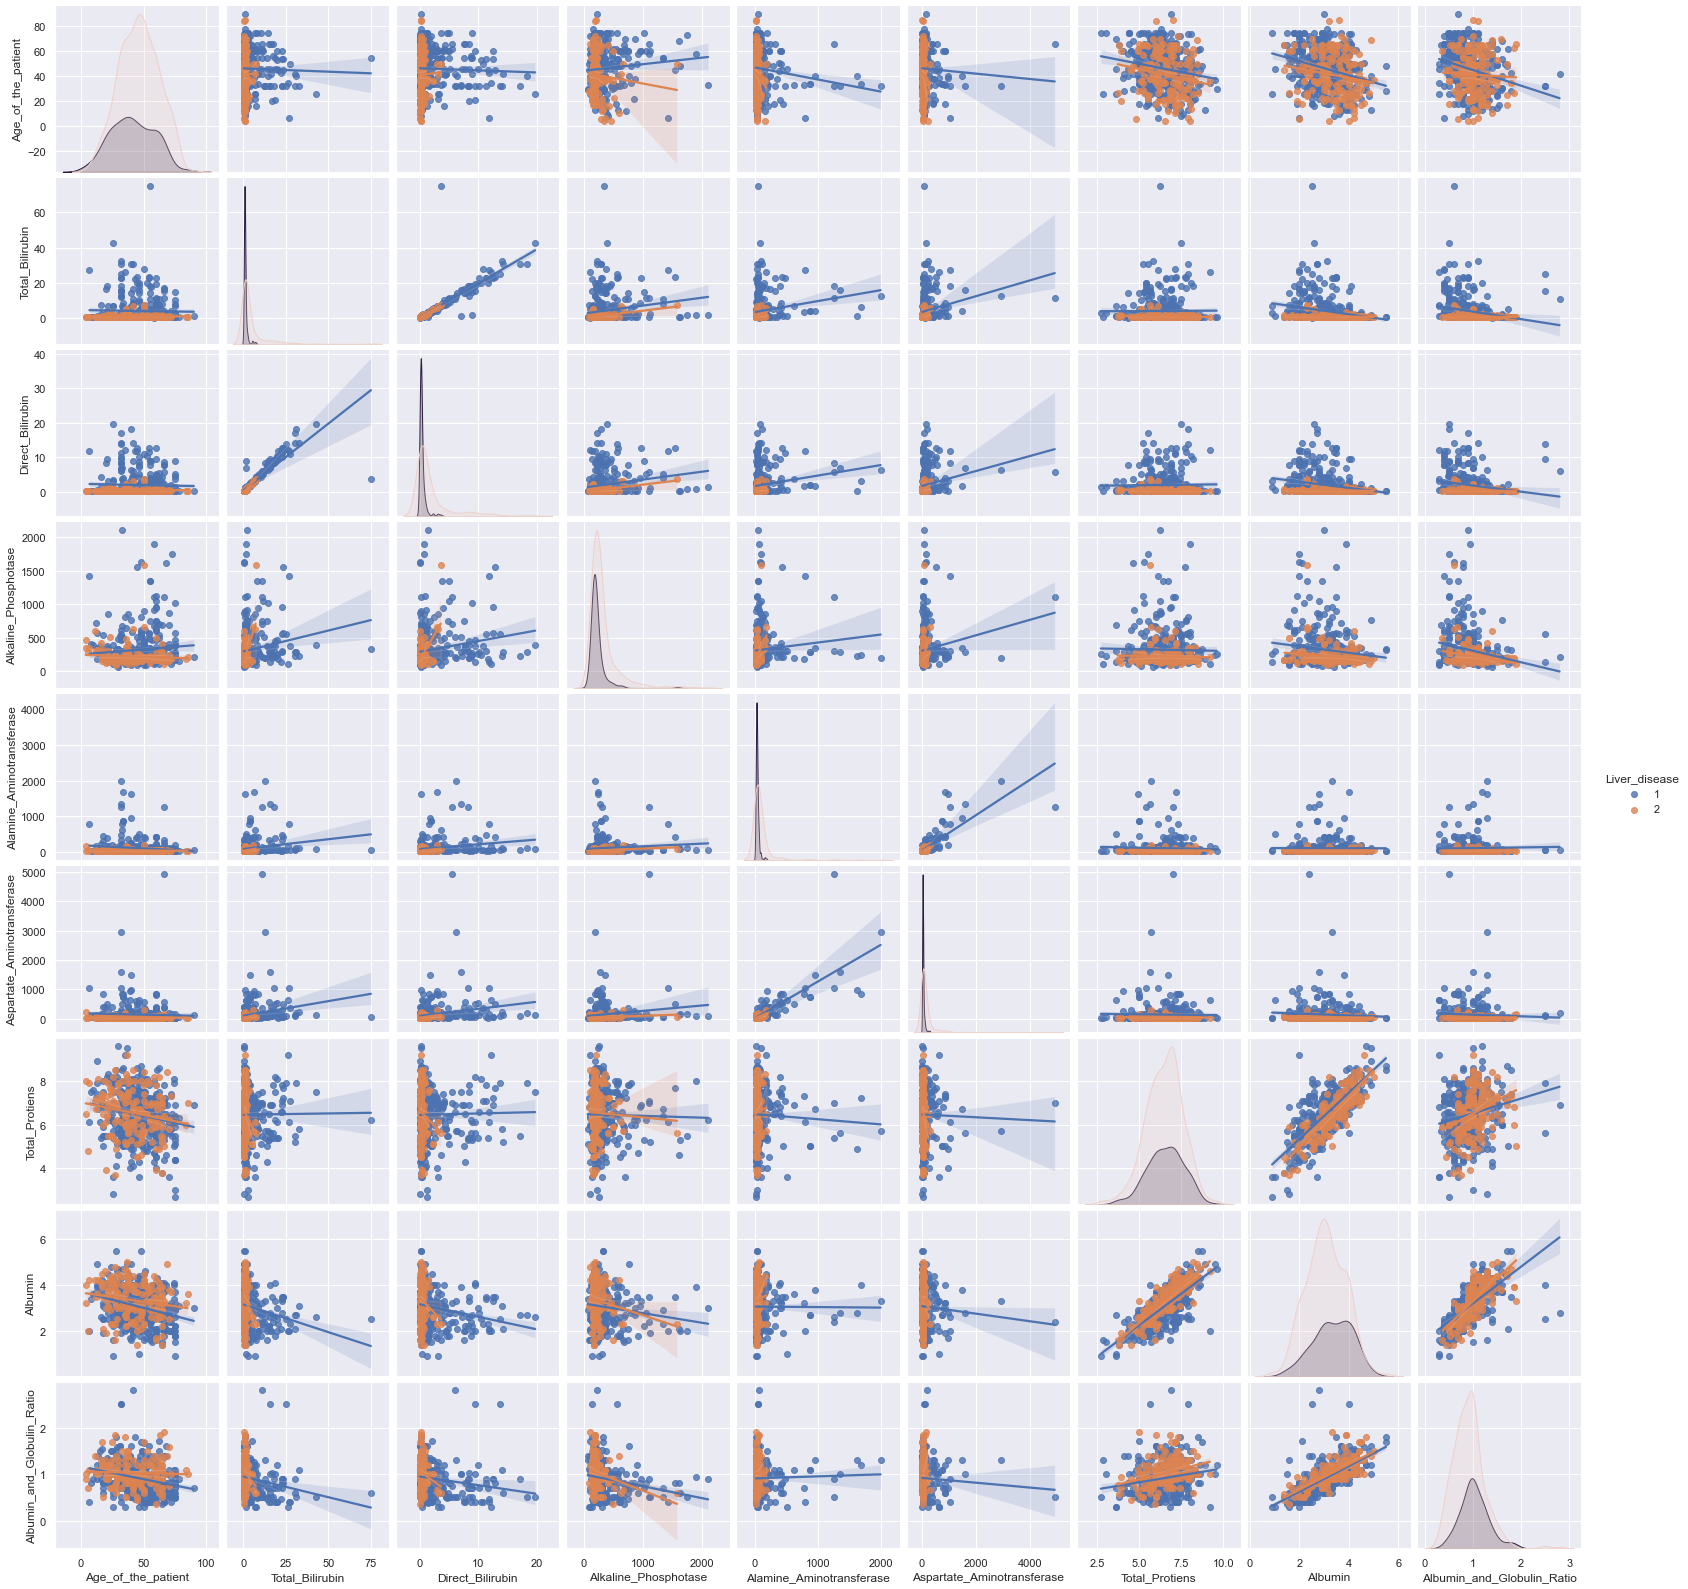

In [20]:
sns.set()
sns.pairplot(data, hue='Liver_disease', kind='reg')

# Analysing of data

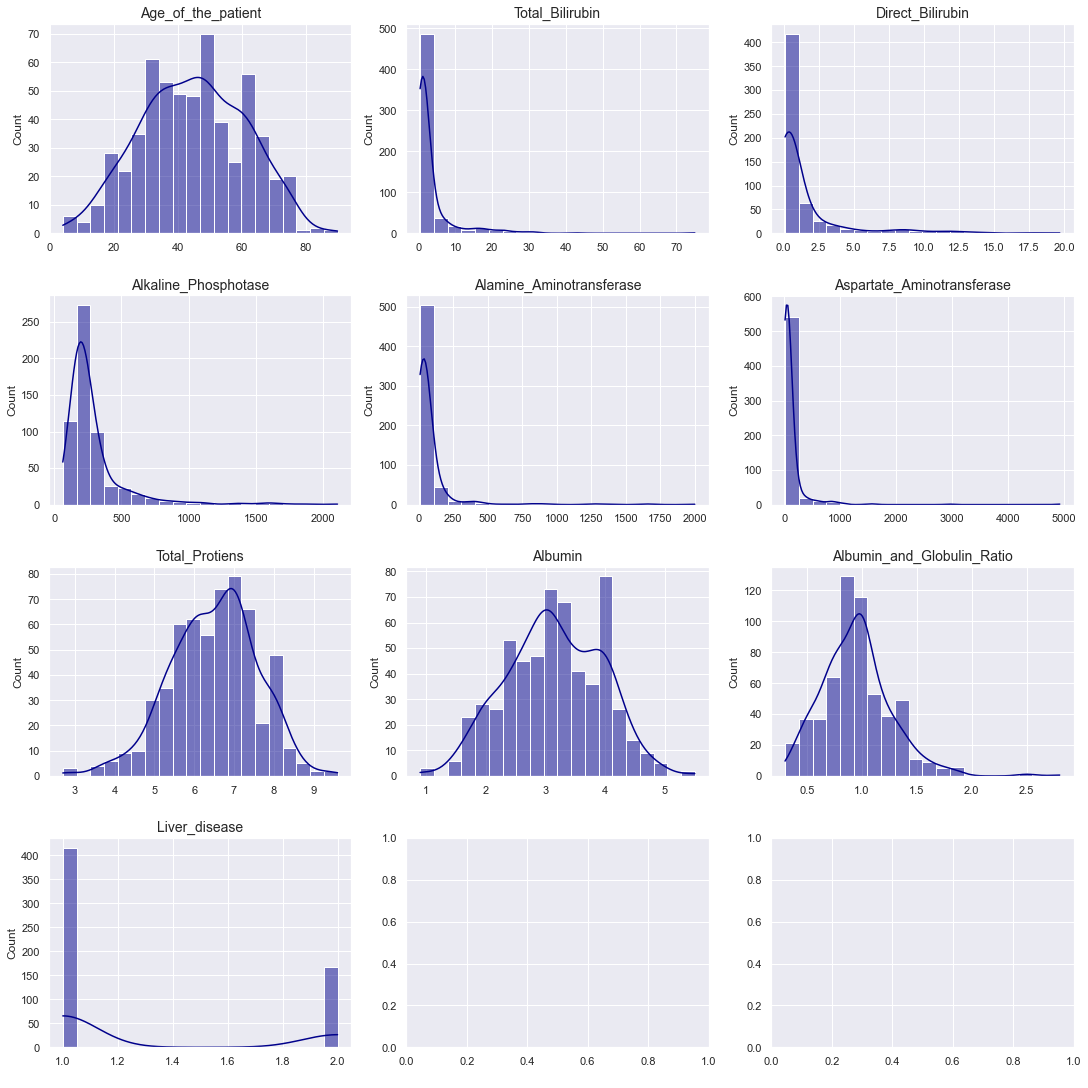

In [21]:
fig, axs = plt.subplots(4, 3, figsize=(15, 15), constrained_layout=True)

for ax, column in zip(axs.flat, data.loc[:,data.dtypes != 'object'].columns):
    ax.set_title(f'{column}', fontsize=14);
    
    
    sns.histplot(data=data, x=column, kde=True, bins=20,color = 'darkblue',ax=ax);
    ax.set_xlabel(xlabel='  ');


# Insights:
## Total_Bilirubin and Direct_Bilirubin shows standard normal distribution and Total_Protiens,Albumin and Albumin_and_Globulin_Ratio shows normal distribution.


# Data Preprocessing and Feature engineering

In [22]:
data.head()

,Age_of_the_patient,Gender_of_the_patient,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_disease
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


# Checking Missing values

In [23]:
data.isnull().sum()

Age_of_the_patient            0
Gender_of_the_patient         0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Liver_disease                 0
dtype: int64

In [24]:
data.Albumin_and_Globulin_Ratio.isnull().sum()

4

In [25]:
data.Albumin_and_Globulin_Ratio.value_counts()

1.00    106
0.80     65
0.90     59
0.70     53
1.10     46
       ... 
0.71      1
0.88      1
2.80      1
1.36      1
0.53      1
Name: Albumin_and_Globulin_Ratio, Length: 69, dtype: int64

In [26]:
data.loc[data['Albumin_and_Globulin_Ratio'].isnull()==True,'Albumin_and_Globulin_Ratio']='1.00'

In [27]:
data.isnull().sum()

Age_of_the_patient            0
Gender_of_the_patient         0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Liver_disease                 0
dtype: int64

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age_of_the_patient          583 non-null    int64  
 1   Gender_of_the_patient       583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    object 
 10  Liver_disease               583 non-null    int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 50.2+ KB


# Conversion of categorical column into numerical column

In [29]:
data.Gender_of_the_patient.value_counts()

Male      441
Female    142
Name: Gender_of_the_patient, dtype: int64

In [30]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
data['Gender_of_the_patient']=lc.fit_transform(data['Gender_of_the_patient'])

In [31]:
data

,Age_of_the_patient,Gender_of_the_patient,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_disease
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.9,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.0,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.4,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.1,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.0,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.0,1


In [32]:
data['Gender_of_the_patient']=data['Gender_of_the_patient'].astype('int')

In [33]:
data['Albumin_and_Globulin_Ratio']=data['Albumin_and_Globulin_Ratio'].astype('float')

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age_of_the_patient          583 non-null    int64  
 1   Gender_of_the_patient       583 non-null    int32  
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Liver_disease               583 non-null    int64  
dtypes: float64(5), int32(1), int64(5)
memory usage: 47.9 KB


# Checking for Outlier

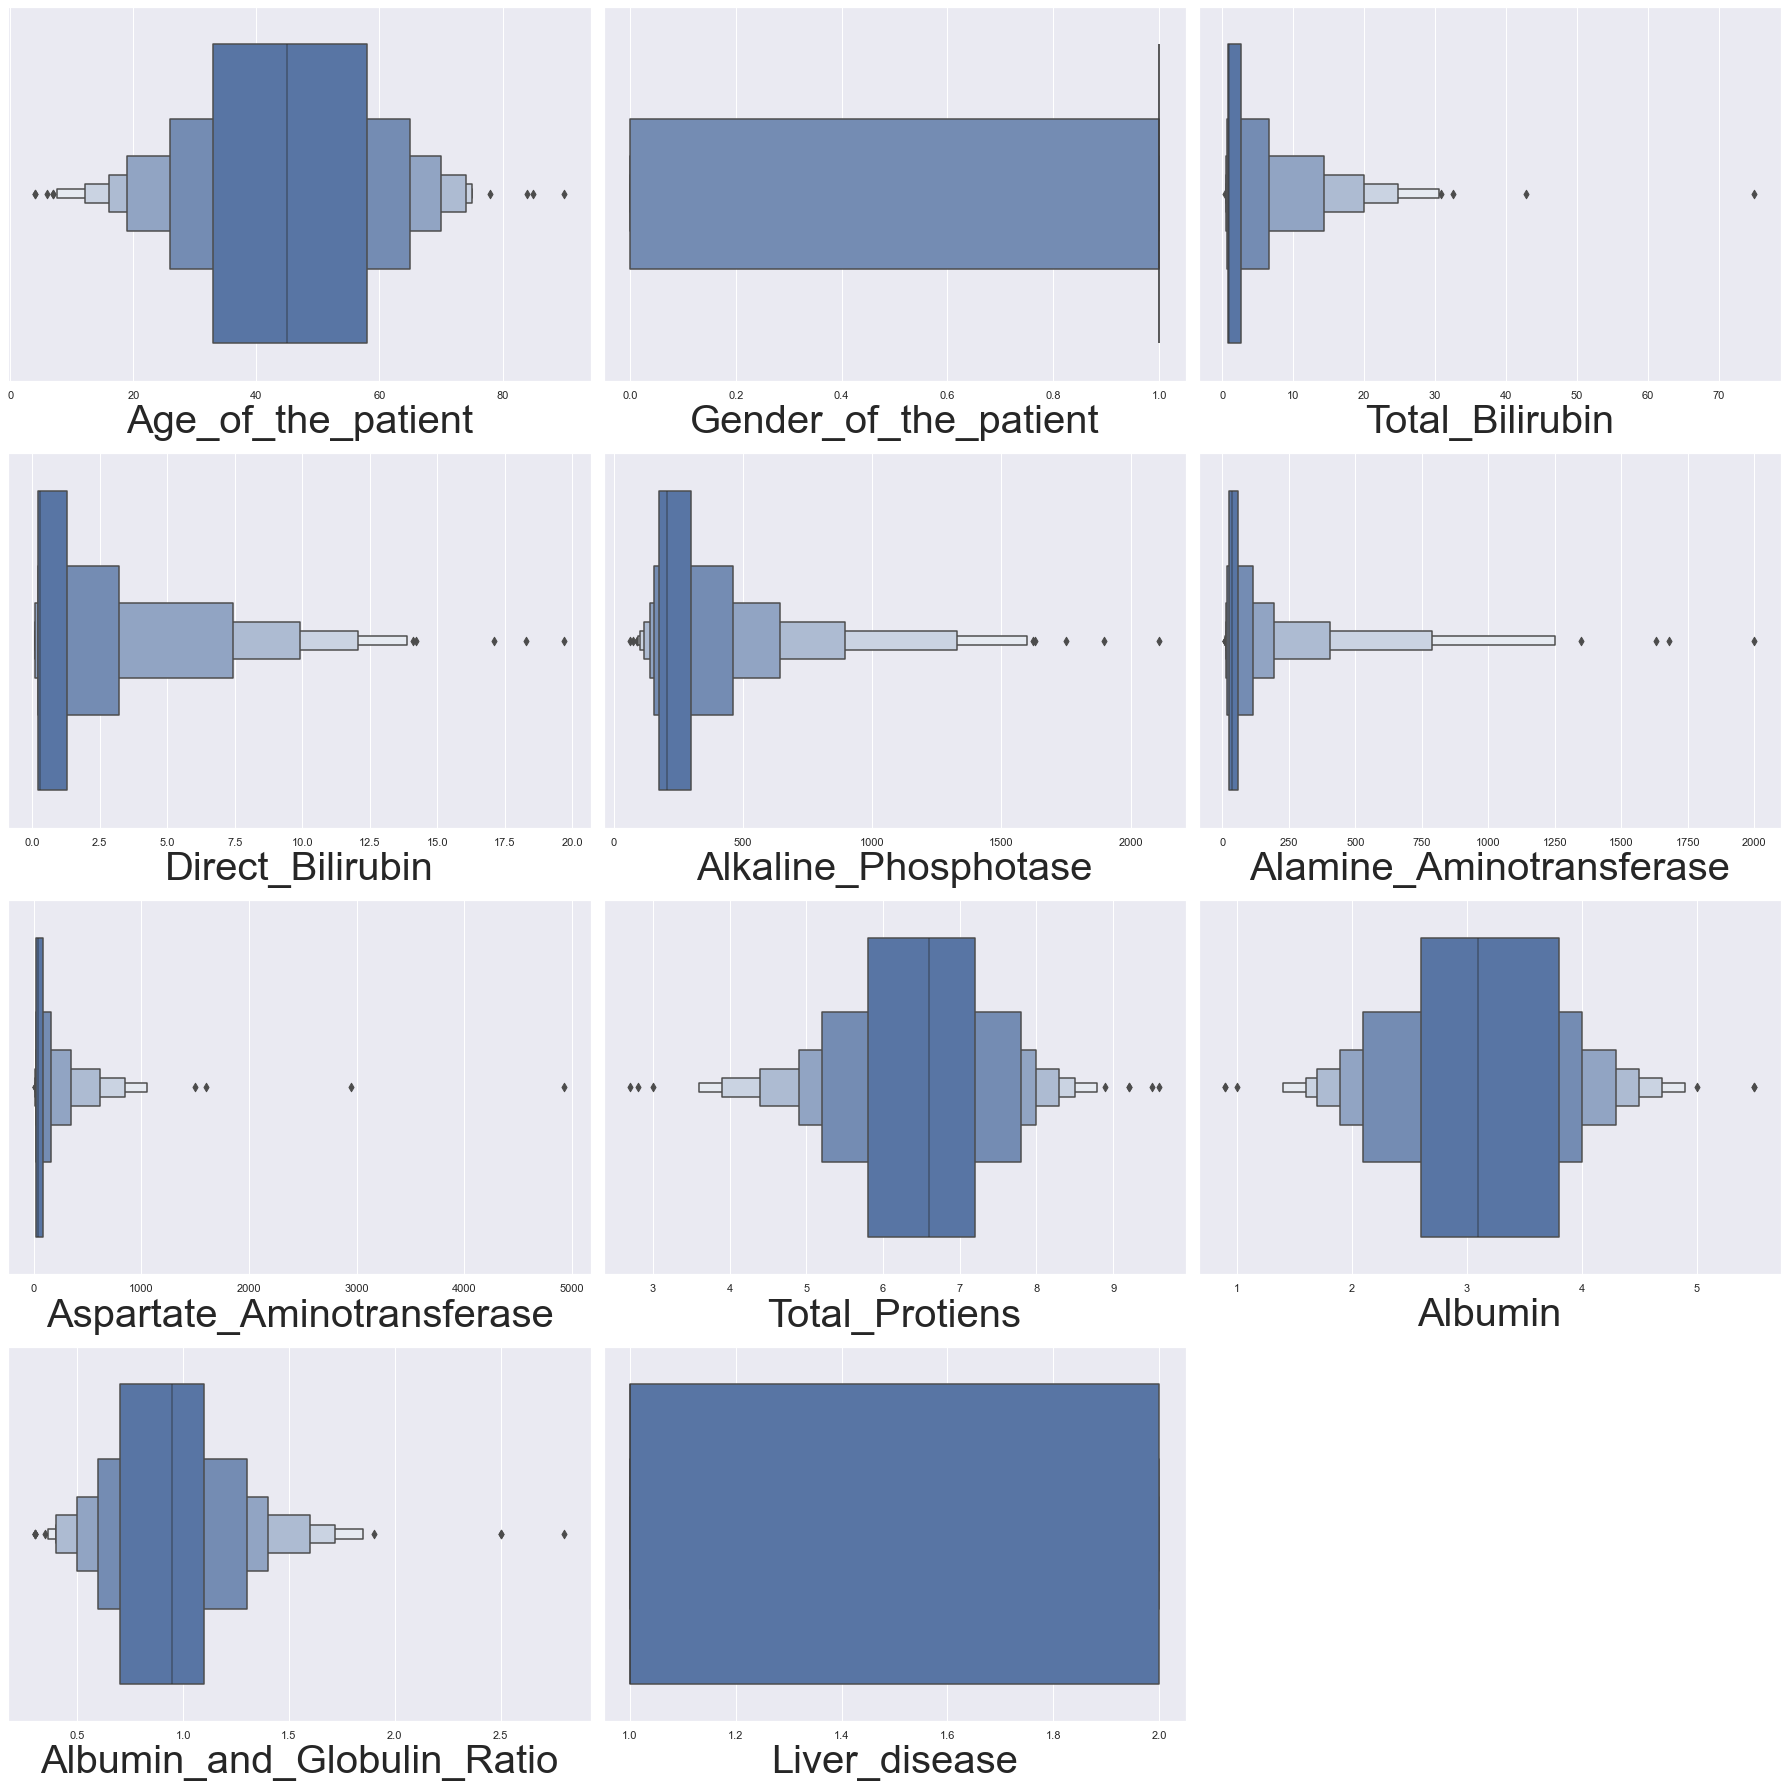

In [35]:
# checking the outlayers
plt.figure(figsize=(25,25),facecolor='white')
plotnumber=1
for columns in data:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxenplot(data[columns])
        plt.xlabel(columns,fontsize=40)
    plotnumber+=1
plt.tight_layout()

### Here we can see that there is an out layers in the above given data ,here in this data there is no importance to handel the out layers

In [36]:
def find_ranges(variable):
    q1 = variable.quantile(0.25)
    q3 = variable.quantile(0.75)
    iqr = q3 - q1
    lower_range = q1 - 1.5 * iqr
    upper_range = q3 + 1.5 * iqr
    return lower_range, upper_range

lower_totbil, upper_totbil = find_ranges(data['Total_Bilirubin'])
lower_dirbil, upper_dirbil = find_ranges(data['Direct_Bilirubin'])
lower_alk, upper_alk = find_ranges(data['Alkaline_Phosphotase'])
lower_alm, upper_alm = find_ranges(data['Alamine_Aminotransferase'])
lower_asp, upper_asp = find_ranges(data['Aspartate_Aminotransferase'])
lower_alb, upper_alb = find_ranges(data['Albumin_and_Globulin_Ratio'])

data['Total_Bilirubin'] = np.where(data['Total_Bilirubin'] > upper_totbil, upper_totbil, np.where(
    data['Total_Bilirubin'] < lower_totbil, lower_totbil, data['Total_Bilirubin']))

data['Direct_Bilirubin'] = np.where(data['Direct_Bilirubin'] > upper_dirbil, upper_dirbil, np.where(
    data['Direct_Bilirubin'] < lower_dirbil, lower_dirbil, data['Direct_Bilirubin']))

data['Alkaline_Phosphotase'] = np.where(data['Alkaline_Phosphotase'] > upper_alk, upper_alk, np.where(
    data['Alkaline_Phosphotase'] < lower_alk, lower_alk, data['Alkaline_Phosphotase']))

data['Alamine_Aminotransferase'] = np.where(data['Alamine_Aminotransferase'] > upper_alm, upper_alm, np.where(
    data['Alamine_Aminotransferase'] < lower_alm, lower_alm, data['Alamine_Aminotransferase']))

data['Aspartate_Aminotransferase'] = np.where(data['Aspartate_Aminotransferase'] > upper_asp, upper_asp, np.where(
    data['Aspartate_Aminotransferase'] < lower_asp, lower_asp, data['Aspartate_Aminotransferase']))

data['Albumin_and_Globulin_Ratio'] = np.where(data['Albumin_and_Globulin_Ratio']> upper_alb, upper_alb,np.where(
    data['Albumin_and_Globulin_Ratio'] < lower_alb, lower_alb, data['Albumin_and_Globulin_Ratio']))
                                                                

<AxesSubplot:xlabel='Albumin_and_Globulin_Ratio'>

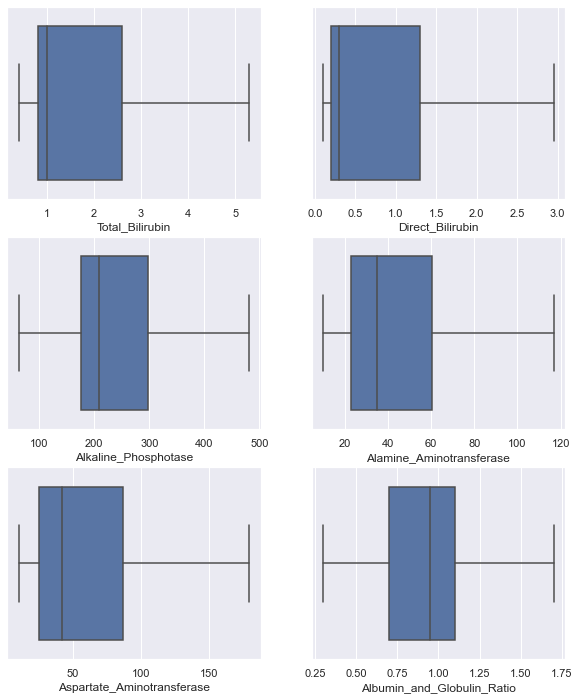

In [37]:
#Checking the Outliers again
fig , ax  = plt.subplots(3, 2, figsize  = (10 ,12))
sns.boxplot(data.Total_Bilirubin, ax  = ax[0,0])
sns.boxplot(data.Direct_Bilirubin, ax  = ax[0,1])
sns.boxplot(data.Alkaline_Phosphotase, ax  = ax[1,0])
sns.boxplot(data.Alamine_Aminotransferase, ax  = ax[1,1])
sns.boxplot(data.Aspartate_Aminotransferase, ax  = ax[2,0])
sns.boxplot(data.Albumin_and_Globulin_Ratio, ax  = ax[2,1])

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age_of_the_patient          583 non-null    int64  
 1   Gender_of_the_patient       583 non-null    int32  
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    float64
 5   Alamine_Aminotransferase    583 non-null    float64
 6   Aspartate_Aminotransferase  583 non-null    float64
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Liver_disease               583 non-null    int64  
dtypes: float64(8), int32(1), int64(2)
memory usage: 47.9 KB


# Scaling the data

In [39]:
# scaling the data
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
data[['Age_of_the_patient','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio']]= scale.fit_transform(data[['Age_of_the_patient','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio']])

In [40]:
data

,Age_of_the_patient,Gender_of_the_patient,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_disease
0,0.709302,0,0.061224,0.000000,0.296119,0.056206,0.047059,0.594203,0.521739,0.428571,1
1,0.674419,1,1.000000,1.000000,1.000000,0.505855,0.529412,0.695652,0.500000,0.314286,1
2,0.674419,1,1.000000,1.000000,1.000000,0.468384,0.341176,0.623188,0.521739,0.421429,1
3,0.627907,1,0.122449,0.105263,0.284179,0.037471,0.058824,0.594203,0.543478,0.500000,1
4,0.790698,1,0.714286,0.666667,0.315224,0.159251,0.288235,0.666667,0.326087,0.071429,1
...,...,...,...,...,...,...,...,...,...,...,...
578,0.651163,1,0.020408,0.000000,1.000000,0.093677,0.141176,0.463768,0.152174,0.050000,2
579,0.418605,1,0.040816,0.000000,0.083582,0.234192,0.123529,0.478261,0.500000,0.571429,1
580,0.558140,1,0.081633,0.035088,0.434627,0.355972,0.229412,0.536232,0.500000,0.500000,1
581,0.313953,1,0.183673,0.140351,0.288955,0.177986,0.129412,0.594203,0.543478,0.500000,1


# Feature Selection

<AxesSubplot:>

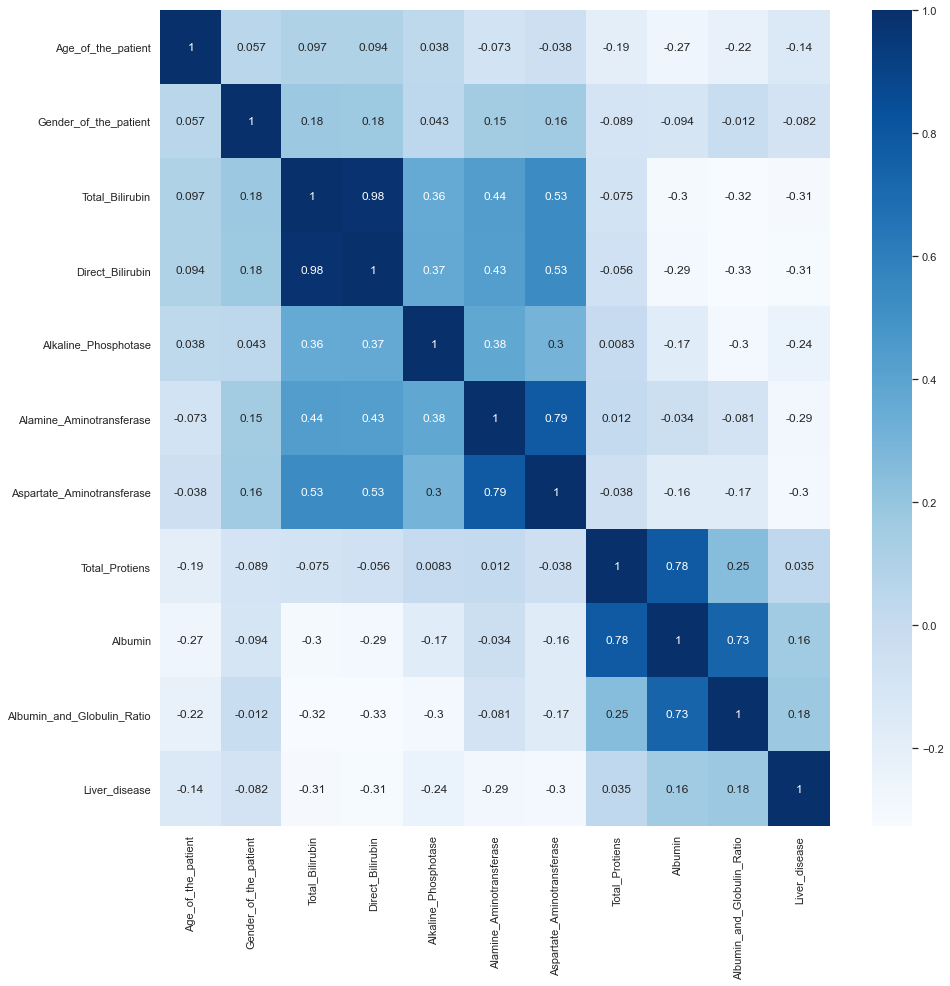

In [41]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),cmap='Blues',annot=True)

# The correlation between Direct_Bilirubin and Total_Bilirubin is high , Alamine_Aminotransferase and Aspartate_Aminotransferase is high, Total_Protiens and Albumin is high, Albumin and Albumin_and_Globulin_Ratio is high

In [42]:
data.describe()

,Age_of_the_patient,Gender_of_the_patient,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_disease
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,0.473792,0.756432,0.310498,0.273570,0.449573,0.354972,0.322551,0.548288,0.487359,0.458135,1.286449
std,0.188254,0.429603,0.337597,0.348886,0.261431,0.311735,0.315650,0.157312,0.172939,0.211698,0.452490
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.337209,1.000000,0.081633,0.035088,0.268657,0.121780,0.088235,0.449275,0.369565,0.285714,1.000000
50%,0.476744,1.000000,0.122449,0.070175,0.346269,0.234192,0.188235,0.565217,0.478261,0.464286,1.000000
75%,0.627907,1.000000,0.448980,0.421053,0.561194,0.473068,0.452941,0.652174,0.630435,0.571429,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


# Model creation

In [43]:
x=data.drop('Liver_disease',axis=True)


In [44]:
y=data['Liver_disease']

In [45]:
x

,Age_of_the_patient,Gender_of_the_patient,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,0.709302,0,0.061224,0.000000,0.296119,0.056206,0.047059,0.594203,0.521739,0.428571
1,0.674419,1,1.000000,1.000000,1.000000,0.505855,0.529412,0.695652,0.500000,0.314286
2,0.674419,1,1.000000,1.000000,1.000000,0.468384,0.341176,0.623188,0.521739,0.421429
3,0.627907,1,0.122449,0.105263,0.284179,0.037471,0.058824,0.594203,0.543478,0.500000
4,0.790698,1,0.714286,0.666667,0.315224,0.159251,0.288235,0.666667,0.326087,0.071429
...,...,...,...,...,...,...,...,...,...,...
578,0.651163,1,0.020408,0.000000,1.000000,0.093677,0.141176,0.463768,0.152174,0.050000
579,0.418605,1,0.040816,0.000000,0.083582,0.234192,0.123529,0.478261,0.500000,0.571429
580,0.558140,1,0.081633,0.035088,0.434627,0.355972,0.229412,0.536232,0.500000,0.500000
581,0.313953,1,0.183673,0.140351,0.288955,0.177986,0.129412,0.594203,0.543478,0.500000


In [46]:
y

0      1
1      1
2      1
3      1
4      1
      ..
578    2
579    1
580    1
581    1
582    2
Name: Liver_disease, Length: 583, dtype: int64

In [47]:
!pip install imblearn

In [48]:
from collections import Counter
from imblearn.over_sampling import SMOTE
sm=SMOTE()
print(Counter(y))
x,y=sm.fit_resample(x,y)
print(Counter(y))

Counter({1: 416, 2: 167})
Counter({1: 416, 2: 416})


In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10)

In [50]:
x_train

,Age_of_the_patient,Gender_of_the_patient,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
538,0.558140,1,0.285714,0.245614,0.081194,0.702576,0.400000,0.536232,0.391304,0.285714
683,0.521637,0,0.049340,0.004885,0.288019,0.074703,0.117047,0.543024,0.428730,0.305602
175,0.313953,1,0.081633,0.035088,0.322388,0.309133,0.123529,0.666667,0.673913,0.642857
818,0.531768,0,0.044679,0.006641,0.479412,0.112914,0.172647,0.367029,0.259705,0.176657
329,0.197674,1,0.061224,0.035088,0.353433,0.037471,0.076471,0.666667,0.695652,0.642857
...,...,...,...,...,...,...,...,...,...,...
369,0.627907,0,0.081633,0.035088,0.160000,0.131148,0.088235,0.623188,0.673913,0.714286
320,0.302326,0,0.061224,0.035088,0.000000,0.196721,0.100000,0.449275,0.543478,0.785714
527,0.418605,1,0.632653,0.526316,0.561194,0.543326,1.000000,0.637681,0.543478,0.428571
125,0.651163,1,0.285714,0.140351,0.329552,0.327869,0.088235,0.173913,0.173913,0.285714


In [51]:
# importing modules from sklearn libarary..

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,precision_score,recall_score,classification_report
from sklearn.model_selection import train_test_split

# LogisticRegression

In [52]:
lr=LogisticRegression()

In [53]:
lr.fit(x_train,y_train)

LogisticRegression()

In [54]:
lr_pred=lr.predict(x_test)

In [55]:
lr_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1,
       2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1,
       2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1,
       1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2,
       2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2,
       2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2,
       2, 2, 1, 1, 2, 1, 1, 2, 1, 2], dtype=int64)

In [56]:
lr_acc=accuracy_score(y_test,lr_pred)
lr_acc

0.7307692307692307

In [57]:
lr_f1=f1_score(y_test,lr_pred)
lr_f1

0.7142857142857143

In [58]:
lr_press=precision_score(y_test,lr_pred)
lr_press

0.8045977011494253

In [59]:
cm=confusion_matrix(y_test,lr_pred)
cm

array([[70, 39],
       [17, 82]], dtype=int64)

In [60]:
cr=classification_report(y_test,lr_pred)
print(cr)

              precision    recall  f1-score   support

           1       0.80      0.64      0.71       109
           2       0.68      0.83      0.75        99

    accuracy                           0.73       208
   macro avg       0.74      0.74      0.73       208
weighted avg       0.74      0.73      0.73       208



In [61]:
# training score
train_score=lr.score(x_train,y_train)
print("training score = ",train_score)

training score =  0.7147435897435898


# Naive Bayes

In [62]:
gus=GaussianNB()
gus.fit(x_train,y_train)

GaussianNB()

In [63]:
gus_pred=gus.predict(x_test)
gus_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1,
       2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1,
       2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1,
       1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2,
       2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2,
       2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2,
       2, 2, 2, 1, 2, 1, 2, 2, 1, 2], dtype=int64)

In [64]:
gus_acc=accuracy_score(y_test,gus_pred)
gus_acc

0.75

In [65]:
gus_f1=f1_score(y_test,gus_pred)
gus_f1

0.7142857142857142

In [66]:
gus_press=precision_score(y_test,gus_pred)
gus_press

0.8904109589041096

In [67]:
cm=confusion_matrix(y_test,gus_pred)
cm

array([[65, 44],
       [ 8, 91]], dtype=int64)

In [68]:
cr=classification_report(y_test,gus_pred)
print(cr)

              precision    recall  f1-score   support

           1       0.89      0.60      0.71       109
           2       0.67      0.92      0.78        99

    accuracy                           0.75       208
   macro avg       0.78      0.76      0.75       208
weighted avg       0.79      0.75      0.74       208



# Decision tree

In [69]:
dt=DecisionTreeClassifier(max_depth=None,random_state=12,max_features=None,min_samples_leaf=30)
dt.fit(x_train,y_train)

DecisionTreeClassifier(min_samples_leaf=30, random_state=12)

In [70]:
dt_pred=dt.predict(x_test)
dt_pred

array([2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1,
       2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1,
       2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2,
       1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1,
       2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2,
       1, 2, 2, 1, 2, 1, 2, 2, 1, 2], dtype=int64)

In [71]:
dt_acc=accuracy_score(y_test,dt_pred)
dt_acc

0.6634615384615384

In [72]:
dt_f1=f1_score(y_test,dt_pred)
dt_f1

0.6534653465346535

In [73]:
dt_press=precision_score(y_test,dt_pred)
dt_press

0.7096774193548387

In [74]:
cm=confusion_matrix(y_test,dt_pred)
cm

array([[66, 43],
       [27, 72]], dtype=int64)

In [75]:
cr=classification_report(y_test,dt_pred)
print(cr)

              precision    recall  f1-score   support

           1       0.71      0.61      0.65       109
           2       0.63      0.73      0.67        99

    accuracy                           0.66       208
   macro avg       0.67      0.67      0.66       208
weighted avg       0.67      0.66      0.66       208



# 1)Hyperparameter Tuning for Decision Tree : 

In [76]:
from sklearn.model_selection import GridSearchCV

In [77]:
params = {
    "criterion":("gini", "entropy"), #quality of split
    "splitter":("best", "random"), # searches the features for a split
    "max_depth":(list(range(1,10))), #depth of tree range from 1 to 19
    "min_samples_split":[2, 3, 4],    #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1,10)),#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19 
}


DT_HT = DecisionTreeClassifier(random_state=333)#object creation for decision tree with random state
DT_HT_GCV= GridSearchCV(DT_HT, params, scoring="f1_macro", n_jobs=-1, verbose=1, cv=3)
#passing model to gridsearchCV ,

#tree_clf-->model
#params---->hyperparametes(dictinoary we created)
#scoring--->performance matrix to check performance
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.
#verbose=Controls the verbosity: the higher, the more messages.
#>1 : the computation time for each fold and parameter candidate is displayed;
#>2 : the score is also displayed;
#>3 : the fold and candidate parameter indexes are also displayed together with the starting time of the computation.
#cv------> number of folds

DT_HT_GCV.fit(x_train,y_train)#training data on gridsearch cv
best_params = DT_HT_GCV.best_params_#it will give you best parameters 

print(f"Best paramters: {best_params})")#printing  best parameters
print(DT_HT_GCV.best_score_)#getting best score from cv

Fitting 3 folds for each of 972 candidates, totalling 2916 fits
Best paramters: {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'})
0.721999805233251


In [78]:
print(f"Best paramters: {best_params})")#printing  best parameters
print(DT_HT_GCV.best_score_)#getting best score from cv

Best paramters: {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'})
0.721999805233251


In [79]:
DT_HT=DecisionTreeClassifier(criterion='entropy',max_depth=9,min_samples_leaf= 7,min_samples_split=2,splitter='random')
DT_HT.fit(x_train,y_train)

y_pred_DT_HT= DT_HT.predict(x_test)

In [80]:
DT_HT_cr=classification_report(y_test,y_pred_DT_HT)
print(DT_HT_cr)

              precision    recall  f1-score   support

           1       0.76      0.69      0.72       109
           2       0.69      0.76      0.72        99

    accuracy                           0.72       208
   macro avg       0.72      0.72      0.72       208
weighted avg       0.72      0.72      0.72       208



In [81]:
pd.crosstab(y_test,y_pred_DT_HT)

col_0,1,2
Liver_disease,,
1,75,34
2,24,75


In [82]:
dt_ht_acc=accuracy_score(y_test,y_pred_DT_HT)
dt_ht_acc

0.7211538461538461

# Random Forest

In [83]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [84]:
rf_pred=rf.predict(x_test)
rf_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1,
       1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1,
       2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2,
       1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1,
       1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2,
       2, 2, 1, 1, 2, 2, 2, 2, 1, 2], dtype=int64)

In [85]:
rf_acc=accuracy_score(y_test,rf_pred)
rf_acc

0.8317307692307693

In [86]:
rf_f1=f1_score(y_test,rf_pred)
rf_f1

0.8223350253807107

In [87]:
rf_press=precision_score(y_test,rf_pred)
rf_press

0.9204545454545454

In [88]:
clf=classification_report(y_test,rf_pred)
print(clf)

              precision    recall  f1-score   support

           1       0.92      0.74      0.82       109
           2       0.77      0.93      0.84        99

    accuracy                           0.83       208
   macro avg       0.84      0.84      0.83       208
weighted avg       0.85      0.83      0.83       208



In [89]:
cm=confusion_matrix(y_test,rf_pred)
print(cm)

[[81 28]
 [ 7 92]]


# 2)Hyperparameter Tuning for Random Forest :

In [90]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=600, num=3)]#List Comprehension-using for loop in list
max_features = ['auto', 'sqrt']#maximum number of features allowed to try in individual tree
max_depth = [int(x) for x in np.linspace(0, 90, num=3)]#List Comprehension-using for loop in list
#max_depth.append(None)
min_samples_split = [2,4,6]#minimum number of samples required to split an internal node
min_samples_leaf = [1,2,4]#minimum number of samples required to be at a leaf node.

#dictionary for hyperparameters
params = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

RF_HT = RandomForestClassifier(random_state=333)#model
RF_HT_RCV = RandomizedSearchCV(RF_HT,params,scoring='f1_macro',cv=3,n_jobs=-1,verbose=5)


#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of flods
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.

RF_HT_RCV.fit(x_train, y_train)
RF_HT_RCV.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 45}

In [91]:
print(f"Best paramters: {RF_HT_RCV.best_params_})")
print(RF_HT_RCV.best_score_)

Best paramters: {'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 45})
0.7771846447875504


In [92]:
RF_HT = RandomForestClassifier(n_estimators= 400, min_samples_split = 2, min_samples_leaf = 1, 
                               max_features = 'auto', max_depth = 90)
RF_HT.fit(x_train, y_train)
y_pred_RF_HT=RF_HT.predict(x_test)

In [93]:
RF_HT_cr=classification_report(y_test,y_pred_RF_HT)
print(RF_HT_cr)

              precision    recall  f1-score   support

           1       0.91      0.74      0.82       109
           2       0.76      0.92      0.83        99

    accuracy                           0.83       208
   macro avg       0.84      0.83      0.83       208
weighted avg       0.84      0.83      0.83       208



In [94]:
pd.crosstab(y_test,y_pred_RF_HT)

col_0,1,2
Liver_disease,,
1,81,28
2,8,91


In [95]:
rf_ht_acc=accuracy_score(y_test,y_pred_RF_HT)
rf_ht_acc

0.8269230769230769

# Gradient Boosting 

In [96]:
gbm=GradientBoostingClassifier()
gbm.fit(x_train,y_train)

GradientBoostingClassifier()

In [97]:
gbm_pred=gbm.predict(x_test)
gbm_pred

array([2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2,
       1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2,
       1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1,
       2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1,
       1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2,
       1, 2, 1, 1, 2, 1, 1, 2, 1, 1], dtype=int64)

In [98]:
gbm_acc=accuracy_score(y_test,gbm_pred)
gbm_acc

0.7740384615384616

In [99]:
gbm_f1=f1_score(y_test,gbm_pred)
gbm_f1

0.7813953488372094

In [100]:
gbm_press=precision_score(y_test,gbm_pred)
gbm_press

0.7924528301886793

In [101]:
cm=confusion_matrix(y_test,gbm_pred)
cm

array([[84, 25],
       [22, 77]], dtype=int64)

In [102]:
clr=classification_report(y_test,gbm_pred)
print(clr)

              precision    recall  f1-score   support

           1       0.79      0.77      0.78       109
           2       0.75      0.78      0.77        99

    accuracy                           0.77       208
   macro avg       0.77      0.77      0.77       208
weighted avg       0.77      0.77      0.77       208



# 3)Hyperparameter tuning for Gradient Boosting Classifier :

In [103]:
from sklearn.model_selection import GridSearchCV

GBC= GradientBoostingClassifier()
parameters = {
    "n_estimators":[50,100,150],
    "max_depth":[1,3,5],
    "learning_rate":[0.001,0.01,0.1]
}

GBC_GSC_HT=GridSearchCV(GBC,parameters,cv=3,n_jobs=-1,scoring='f1_macro',verbose=5)
GBC_GSC_HT.fit(x_train,y_train)

print(GBC_GSC_HT.best_params_)
print(GBC_GSC_HT.best_score_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}
0.7758574286851502


In [104]:
GBC_HT=GradientBoostingClassifier(learning_rate=0.1,max_depth=5,n_estimators=100)

GBC_HT.fit(x_train,y_train)
y_pred_GBC_HT=GBC_HT.predict(x_test)

print(classification_report(y_test,y_pred_GBC_HT))

              precision    recall  f1-score   support

           1       0.86      0.77      0.81       109
           2       0.77      0.86      0.81        99

    accuracy                           0.81       208
   macro avg       0.81      0.81      0.81       208
weighted avg       0.82      0.81      0.81       208



In [105]:
pd.crosstab(y_test,y_pred_GBC_HT)

col_0,1,2
Liver_disease,,
1,84,25
2,14,85


In [106]:
gbm_ht_acc=accuracy_score(y_test,y_pred_GBC_HT)
gbm_ht_acc

0.8125

# KNN Classifier

In [107]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [108]:
knn_pred=knn.predict(x_test)
knn_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1,
       2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2,
       2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1,
       2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 2], dtype=int64)

In [109]:
knn_acc=accuracy_score(y_test,knn_pred)
knn_acc

0.7884615384615384

In [110]:
knn_f1=f1_score(y_test,knn_pred)
knn_acc

0.7884615384615384

In [111]:
knn_press=precision_score(y_test,knn_pred)
knn_press

0.922077922077922

In [112]:
cl=classification_report(y_test,knn_pred)
print(cl)

              precision    recall  f1-score   support

           1       0.92      0.65      0.76       109
           2       0.71      0.94      0.81        99

    accuracy                           0.79       208
   macro avg       0.82      0.80      0.79       208
weighted avg       0.82      0.79      0.78       208



In [113]:
cr=confusion_matrix(y_test,knn_pred)
cr

array([[71, 38],
       [ 6, 93]], dtype=int64)

# Naive Bayes :

In [114]:
from sklearn.naive_bayes import GaussianNB
NB= GaussianNB()

NB.fit(x_train,y_train)
y_pred_NB = NB.predict(x_test)

NB_cr=classification_report(y_test,y_pred_NB)
print(NB_cr)

              precision    recall  f1-score   support

           1       0.89      0.60      0.71       109
           2       0.67      0.92      0.78        99

    accuracy                           0.75       208
   macro avg       0.78      0.76      0.75       208
weighted avg       0.79      0.75      0.74       208



In [115]:
pd.crosstab(y_test, y_pred_NB)

col_0,1,2
Liver_disease,,
1,65,44
2,8,91


# 4)Hyperparameter Tuning for Naive Bayes Gaussian :

In [116]:
from sklearn.model_selection import StratifiedKFold
cv_method = StratifiedKFold(n_splits=5)

In [117]:
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import GridSearchCV

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

NB_HT= GridSearchCV(estimator=NB, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='f1_macro')

Data_transformed = PowerTransformer().fit_transform(x_train)

NB_HT.fit(Data_transformed, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.3366...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='f1_macro', verbose=1)

In [118]:
print(NB_HT.best_params_)
print(NB_HT.best_score_)

{'var_smoothing': 0.0657933224657568}
0.6852035679680133


In [119]:
results_NB_HT = pd.DataFrame(NB_HT.cv_results_['params'])
results_NB_HT['test_score'] = NB_HT.cv_results_['mean_test_score']

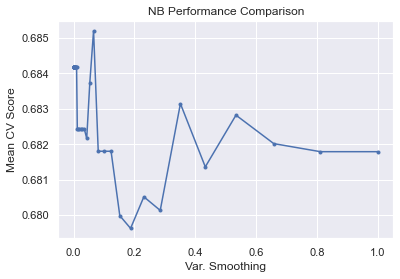

In [120]:
plt.plot(results_NB_HT['var_smoothing'], results_NB_HT['test_score'], marker = '.')    
plt.xlabel('Var. Smoothing')
plt.ylabel("Mean CV Score")
plt.title("NB Performance Comparison")
plt.show()

In [121]:
NB_HT= GaussianNB(var_smoothing=0.23)
NB_HT.fit(x_train,y_train)
y_pred_NB_HT = NB_HT.predict(x_test)

NB_HT_cr=classification_report(y_test,y_pred_NB_HT)
print(NB_HT_cr)

              precision    recall  f1-score   support

           1       0.91      0.58      0.71       109
           2       0.67      0.94      0.78        99

    accuracy                           0.75       208
   macro avg       0.79      0.76      0.74       208
weighted avg       0.80      0.75      0.74       208



In [122]:
pd.crosstab(y_test, y_pred_NB_HT)

col_0,1,2
Liver_disease,,
1,63,46
2,6,93


In [123]:
nb_ht_acc=accuracy_score(y_test, y_pred_NB_HT)
nb_ht_acc

0.75

# Model evaluation

In [124]:
model=pd.DataFrame({"models":["LogisticRegression","Naive Bayes","Decision tree","Random Forest","Gradient Boosting","KNN Classifier"],
                   "F1 Score":[lr_f1,gus_f1,dt_acc,rf_f1,gbm_f1,knn_f1],
                   "precision Score":[lr_press,gus_press,dt_press,rf_press,gbm_press,knn_press],
                    "Accuracy Score":[lr_acc,gus_acc,dt_acc,rf_acc,gbm_acc,knn_acc]})
model.sort_values(by='Accuracy Score',ascending=0)

,models,F1 Score,precision Score,Accuracy Score
3,Random Forest,0.822335,0.920455,0.831731
5,KNN Classifier,0.763441,0.922078,0.788462
4,Gradient Boosting,0.781395,0.792453,0.774038
1,Naive Bayes,0.714286,0.890411,0.750000
0,LogisticRegression,0.714286,0.804598,0.730769
2,Decision tree,0.663462,0.709677,0.663462


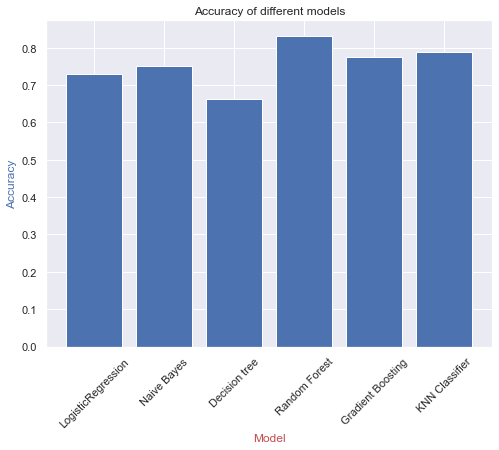

In [125]:
plt.figure(figsize=(8,6))
plt.bar(model['models'], model['Accuracy Score'],color='b')
plt.xlabel('Model',color= 'r')
plt.ylabel('Accuracy', color = 'b')
plt.title('Accuracy of different models')
plt.xticks(rotation=45)
plt.show()

In [126]:
models=pd.DataFrame({"models":["GaussianNB","Decision tree","Random Forest","Gradient Boosting",],
                    "Accuracy Score":[nb_ht_acc,dt_ht_acc,rf_ht_acc,gbm_ht_acc]})
models.sort_values(by='Accuracy Score',ascending=0)

,models,Accuracy Score
2,Random Forest,0.826923
3,Gradient Boosting,0.812500
0,GaussianNB,0.750000
1,Decision tree,0.721154


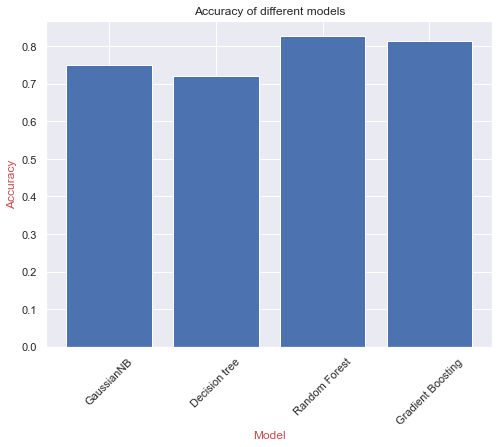

In [128]:
plt.figure(figsize=(8,6))
plt.bar(models['models'], models['Accuracy Score'],color='b')
plt.xlabel('Model',color= 'r')
plt.ylabel('Accuracy', color = 'r')
plt.title('Accuracy of different models')
plt.xticks(rotation=45)
plt.show()

# From the Models (GaussianNB, Decisin tree, Random Forest, Gradient Boosting) Random Forest performs the best on this dataset.
# After doing Hyperparameter Tuning the scores are been increased for some models not got higest scores by doing Hyperparameter Tuning

# Conclusion -

# Maximum accuracy of 83.17% can be achieved. This accuracy has been achieved by Random Forest Model

### Diseases related to liver and heart are becoming more and more common with time. With continuous technological advancements, these are only going to increase in the future. Although people are becoming more conscious of health nowadays and are joining yoga classes, dance classes; still the sedentary lifestyle and luxuries that are continuously being introduced and enhanced; the problem is going to last long. So, in such a scenario, our project will be extremely helpful to the society. With the dataset that we used for this project, we got 83.17 % accuracy for Random Forest model, and though it might be difficult to get such accuracies with very small datasets, from this project’s results, one can clearly conclude that we can predict the risk of liver diseases with accuracy of 83.17 % or more. Today almost everybody above the age of 12 years has smartphones with them, and so we can incorporate these solutions into an android app or ios app. Also it can be incorporated into a website and these app and website will be highly beneficial for a large section of society.

# Can liver disease be prevented?
You can take steps to prevent some types of liver disease — especially those affected by your diet and lifestyle. If you are at risk for liver disease, your provider may recommend lifestyle changes including:

Avoiding or limiting alcohol. Avoiding foods and drinks that contain trans fats or high-fructose corn syrup. Carefully managing your intake of prescription and over-the-counter medications to avoid liver damage, as medications like acetaminophen (Tylenol) are a common cause of liver injury. Getting regular exercise. Limiting consumption of red meat. You can minimize the likelihood of contracting viral hepatitis by practicing safe sex and not sharing needles.